In [39]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
rcParams['font.size']=18
rcParams['lines.markersize']=10

# To start, Run all  use menu: Cell/Run All, then scroll down to plot

If you want to rerun a cell, Select the cell and type "Shift+Enter" or the arrow button.

# One-Dimensional Interference

Two speakers are generating sound that an observer hears a certain distance away. You want to understand how the two waves interfere to create 
* constructive interference 
* destructive or
* something in between. 


To simplify matters we will fix the amplitudes, $a$,  periods, $T$, and wavelengths, $\lambda$, of the two waves to be the same. We will also make it so the waves are both traveling in the same direction. Then we will move the speakers around the room (their $x$-position) and change their initial phase ($\phi_0$).

In [40]:
# set the parameters of the wave
amp = 1.0 # maximum displacement of each wave in meters
lamb = pi # wavelength in meters
period = 2. # period of each wave in seconds
direction = 'right' # both are traveling to the righ

amp_1 = amp
amp_2 = amp
lamb_1 = lamb
lamb_2 = lamb
period_1 = period
period_2 = period
dir_1 = direction
dir_2 = direction

In [41]:
def traveling_wave(x, t, amp, lamb, period, phi_0, direction='left'):

    if direction == 'left':
        return amp*sin( (2*pi/lamb)*x - (2*pi/period)*t + phi_0)
    elif direction == 'right':
        return amp*sin( (2*pi/lamb)*x +(2*pi/period)*t + phi_0)
    else:
        print("direction must be right or left")

In [42]:
def snapshot_one_wave(observer_position, t, 
                  speaker_position, amp, lamb, period, phi_0, direction,
                  label='1'):
    cols = {'1': 'b', '2': 'r', 'None':'k'}
    x = linspace(speaker_position, observer_position, 1000)
    wave = traveling_wave(x-speaker_position,t, amp, lamb, period, phi_0, direction)
    
    plot(x, wave, color=cols[label])
    xlim(min(x), max(x))
    
    plot(speaker_position, 0, '*', label='speaker %s'%label, color=cols[label])

We will also fix the position of the observer and when they hear the sound.

In [43]:
# set the parameters of the observer
observer_position = 8*pi # in meters
observer_time = 0.0      # in seconds

Then the sound heard by the observer, which is the superposition of the two waves is

  $D(x,t) = 2a cos( \Delta \phi / 2)$
    
where $\Delta \phi$ is the **phase difference** between the two waves:
  
  $\Delta \phi = \frac{2 \pi \Delta x}{\lambda} + \frac{2 \pi \Delta t}{T} + \Delta \phi_0 $
  
The $\Delta t$ is the difference in time, but this is always zero for all points in time.

The $\Delta x$ is the difference in position of the two speakers.

The $\Delta \phi_0$ is the difference in initial phase constant between the two speakers.  

So our equation simplifies to :

$\Delta \phi = \frac{2 \pi \Delta x}{\lambda} + \Delta \phi_0 $

To know the interference pattern $D(x,t)$, we need to understand the **difference in the positions between the speakers** $\Delta x$ and the **difference in initial phase constant** between the two speakers.

In [44]:
def add_two_waves(x, t, amp_1, lamb_1, period_1, phi_0_1, dir_0,
                 amp_2, lamb_2, period_2, phi_0_2, dir_1):
    wave1 = traveling_wave(x,t,amp_1, lamb_1, period_1, phi_0_1, direction = dir_0)
    wave2 = traveling_wave(x,t,amp_2, lamb_2, period_2, phi_0_2, direction = dir_1)
    return wave1+wave2

In [45]:
def snapshot_two_waves(observer_time, observer_position,
            speaker_1_position, amp_1, lamb_1, period_1, phi_0_1,dir_1,
            speaker_2_position, amp_2, lab_2, period_2, phi_0_2,dir_2):
    
    if( speaker_1_position < speaker_2_position):
        x = linspace(speaker_2_position, observer_position, 1000)
        min_x = 0.8*speaker_1_position
        max_x = observer_position*1.1
    else:
        x = linspace(speaker_1_position, observer_position, 1000)
        min_x = 0.8*speaker_2_position
        max_x = observer_position*1.1
    
    wave1 = traveling_wave(x-speaker_1_position, observer_time, amp_1, lamb_1, period_1, phi_0_1, dir_1)
    wave2 = traveling_wave(x-speaker_2_position, observer_time, amp_2, lamb_2, period_2, phi_0_2, dir_2)
    
    plot(x, wave1+wave2, 'k')
    plot(observer_position, 0, 'ok', label='observer',)
    
    xlim([min_x, max_x])
    ylim((amp_1+amp_2)*-1.1, (amp_1+amp_2)*1.1)
    xlabel("Position (m)")
    ylabel("Displacement (m)")

## Example 1: Constructive Interference

For *constructive* interference, the total phase difference needs to be *even multiples* of $\pi$, so that $cos(\Delta \phi/2) = 1.$

  $\Delta \phi = 2 \pi m, m = 0,1,2,3...$

We can make $\Delta \phi$ an even multiple of $\pi$ in several ways, by changing the **difference in position** ($\Delta x$) or the **difference in initial phase constant**.


First let's set the initial phase to the same values and then move the speakers to different positions $x_1$ and $x_2$. 

What values of $x_1$ and $x_2$, aside from $x_1 = x_2$ work to give constructive interference? Make three guesses and enter the numbers here. Run the cells to check your work.

In [46]:
# Set the initial phase to the same values
phi_0_1 = pi/3.
phi_0_2 = pi/3.

# Set the positions. CHANGE THESE NUMBERS!
x_1 = 0.
x_2 = 0.

# Remember what the wavelength is:
print("Wavelength: ", lamb, "m")

('Wavelength: ', 3.141592653589793, 'm')


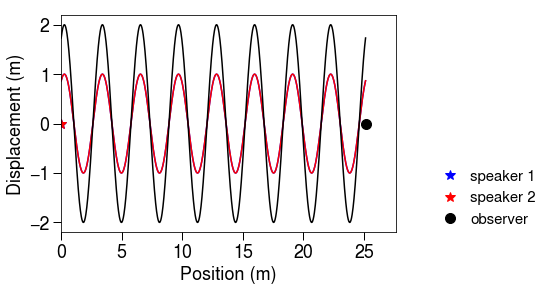

In [47]:
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_1, amp=amp_1, lamb=lamb_1, period=period_1, phi_0=phi_0_1, direction=dir_1,
                         label='1')
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_2, amp=amp_2, lamb=lamb_2, period=period_2, phi_0=phi_0_2,direction=dir_2,
                         label='2')

snapshot_two_waves(observer_time, observer_position,
            x_1, amp_1, lamb_1, period_1, phi_0_1,dir_1,
            x_2, amp_2, lamb_2, period_2, phi_0_2,dir_2)


legend(loc=[1.1,0])

Now let's set the positions to the same value and change the initial phase constants of the speakers.
* If the speakers are driven by the **same source** they have the **same** initial phase constant, because the generator is the same.
* If the speakers are driven by different sources, they could have **any** $\Delta \phi_0$. It just depends on what the initial phase is at the position of the speaker.

What values of $\phi_{0,1}$ and $\phi_{0,2}$, aside from $\phi_{0,1} = \phi_{0,2}$ work to give constructive interference? Make three guesses and enter the numbers here. Run the cells to check your work.

In [63]:
# Set the positions to the same values
x_1 = 0.
x_2 = 0.

# Set the initial phase to the some values. CHANGE THESE NUMBERS!
phi_0_1 = 0.
phi_0_2 = 0.

# Remember what the wavelength is:
print("Wavelength: ", lamb, "m")

('Wavelength: ', 3.141592653589793, 'm')


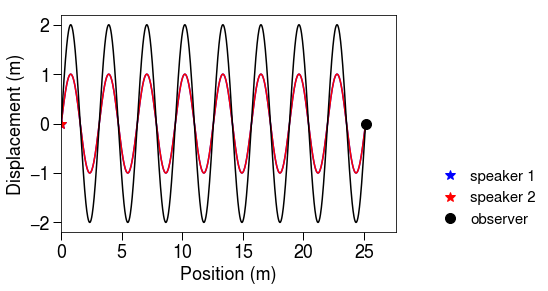

In [64]:
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_1, amp=amp_1, lamb=lamb_1, period=period_1, phi_0=phi_0_1, direction=dir_1,
                         label='1')
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_2, amp=amp_2, lamb=lamb_2, period=period_2, phi_0=phi_0_2,direction=dir_2,
                         label='2')

snapshot_two_waves(observer_time, observer_position,
            x_1, amp_1, lamb_1, period_1, phi_0_1,dir_1,
            x_2, amp_2, lamb_2, period_2, phi_0_2,dir_2)


legend(loc=[1.1,0])

## Example 2: Destructive Interference

For *destructive* interference, $\Delta \phi /2$  needs to be odd multiple of $\pi/2$, so that $cos(\Delta \phi/2) = 0.$ 
Check that the following formula always gives you $\Delta \phi = \pi, 3\pi, 5\pi...$ so that $\Delta \phi/2 = \pi/2, 3\pi/2, 5\pi/2...$

  $\Delta \phi = (m + 1/2) 2 \pi, m = 0,1,2,3...$

We can make $\Delta \phi/2$ an odd multiple of $\pi/2$ in several ways, by changing the **difference in position** ($\Delta x$) or the **difference in initial phase constant**.


First let's set the initial phase to the same values and then move the speakers to different positions $x_1$ and $x_2$. 

What values of $x_1$ and $x_2$, aside the initial values given below work to give destructive interference? Make three guesses and enter the numbers here. Run the cells to check your work.

In [50]:
# Set the initial phase to the same values.
phi_0_1 = pi/3.
phi_0_2 = pi/3.

#  Set the positions. CHANGE THESE NUMBERS!
x_1 = 0.
x_2 = pi/2

# Remember what the wavelength is:
print("Wavelength: ", lamb, "m")

('Wavelength: ', 3.141592653589793, 'm')


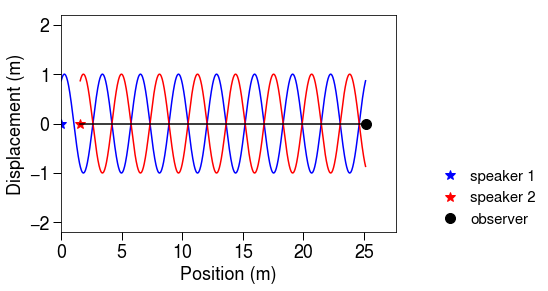

In [51]:
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_1, amp=amp_1, lamb=lamb_1, period=period_1, phi_0=phi_0_1, direction=dir_1,
                         label='1')
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_2, amp=amp_2, lamb=lamb_2, period=period_2, phi_0=phi_0_2,direction=dir_2,
                         label='2')

snapshot_two_waves(observer_time, observer_position,
            x_1, amp_1, lamb_1, period_1, phi_0_1,dir_1,
            x_2, amp_2, lamb_2, period_2, phi_0_2,dir_2)


legend(loc=[1.1,0])

Now let's set the positions to the same value and change the initial phase constants of the speakers.
* If the speakers are driven by the **same source** they have the **same** initial phase constant, because the generator is the same.
* If the speakers are driven by different sources, they could have **any** $\Delta \phi_0$. It just depends on what the initial phase is at the position of the speaker.

What values of $\phi_{0,1}$ and $\phi_{0,2}$, aside from the values given below work to give destructive interference? Make three guesses and enter the numbers here. Run the cells to check your work.

In [61]:
# Fix the positions to the same values. 
x_1 = 0.
x_2 = 0.

# Set the initial phase to some values. CHANGE THESE NUMBERS!
phi_0_1 = 0
phi_0_2 = pi

# Remember what the wavelength is:
print("Wavelength: ", lamb, "m")

('Wavelength: ', 3.141592653589793, 'm')


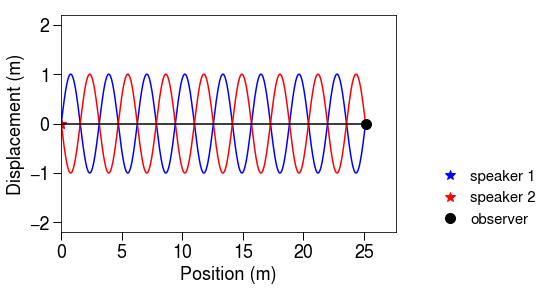

In [62]:
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_1, amp=amp_1, lamb=lamb_1, period=period_1, phi_0=phi_0_1, direction=dir_1,
                         label='1')
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_2, amp=amp_2, lamb=lamb_2, period=period_2, phi_0=phi_0_2,direction=dir_2,
                         label='2')

snapshot_two_waves(observer_time, observer_position,
            x_1, amp_1, lamb_1, period_1, phi_0_1,dir_1,
            x_2, amp_2, lamb_2, period_2, phi_0_2,dir_2)


legend(loc=[1.1,0])

## Example 3: Interference that's something in between Constructive and Destructive

If the phase difference $\Delta \phi$ is not an integer multiple of $\pi$, then cos($\Delta \phi/2$) is neither 0 nor 1, so the interfence of the two waves results in amplitude that is in between the the minimum amplitude you get with fully destructive interference and the maximum amplitude you get with fully constructive interference.

Change *either* the positions or the *initial phase constants* or both to get a resulting wave that has an amplitude that is neither $0$ nor 2$a$. 

Note: The values shown below give constructive interference when you first open this notebook. You have to change things to get something in between.

In [76]:
# Set the positions to some values. CHANGE THESE NUMBERS!
x_1 = 0.
x_2 = 0.

# Set the initial phase to the some values. OR CHANGE THESE NUMBERS!
phi_0_1 = 0.
phi_0_2 = 0.

# Remember what the wavelength is:
print("Wavelength: ", lamb, "m")

# Remeber what the initial amplitude is:
print("Amplitude: ", amp, "m")

('Wavelength: ', 3.141592653589793, 'm')
('Amplitude: ', 1.0, 'm')


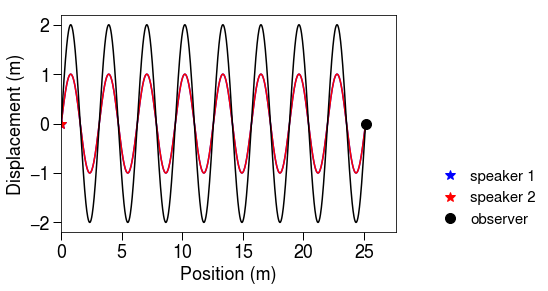

In [77]:
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_1, amp=amp_1, lamb=lamb_1, period=period_1, phi_0=phi_0_1, direction=dir_1,
                         label='1')
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_2, amp=amp_2, lamb=lamb_2, period=period_2, phi_0=phi_0_2,direction=dir_2,
                         label='2')

snapshot_two_waves(observer_time, observer_position,
            x_1, amp_1, lamb_1, period_1, phi_0_1,dir_1,
            x_2, amp_2, lamb_2, period_2, phi_0_2,dir_2)


legend(loc=[1.1,0])

# Beats

Beats occur when the frequencies and therefore wavelengths of two sounds are different. If they are slightly different the resulting interference creates an audible sound called a *beat*. The *beat* has a frequency that is the difference between the frequencies of the two waves.

$f_{beat} = | f_2 - f_1| $

To generate a beat, we will simplify the problem by fixing the period, direction, and amplitude of the two waves. We will also assume that the two speakers generating the two sounds have the same inital phase and position. Then we will vary the frequencies.

In [69]:
# set the parameters of the wave
amp = 1.0 # maximum displacement of each wave in meters
period = 2. # period of each wave in seconds
direction = 'right' # both are traveling to the righ
x = 0.
phi_0 = 0.

amp_1 = amp
amp_2 = amp
lamb_1 = pi
lamb_2 = pi
period_1 = period
period_2 = period
dir_1 = direction
dir_2 = direction
x_1 = x
x_2 = x
phi_0_1 = phi_0
phi_0_2 = phi_0


We also know that sound travels at $v=340 m/s$

In [70]:
v = 340. # m/s

Now let's change the two frequencies. Choose some values. Predict the resulting beat frequency and wavelength. Then measure it on the graph. 

The audible frequency range is 20 Hz to 20,000 Hz.

In [71]:
f_1 = 500. #Hz
f_2 = 510. #Hz

lamb_1 = v/f_1
lamb_2 = v/f_2

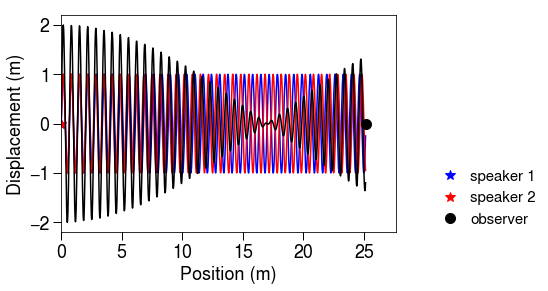

In [72]:
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_1, amp=amp_1, lamb=lamb_1, period=period_1, phi_0=phi_0_1, direction=dir_1,
                         label='1')
snapshot_one_wave(observer_position=observer_position, t=observer_time, 
                         speaker_position=x_2, amp=amp_2, lamb=lamb_2, period=period_2, phi_0=phi_0_2,direction=dir_2,
                         label='2')

snapshot_two_waves(observer_time, observer_position,
            x_1, amp_1, lamb_1, period_1, phi_0_1,dir_1,
            x_2, amp_2, lamb_2, period_2, phi_0_2,dir_2)


legend(loc=[1.1,0])

In [75]:
lamb_1 = lamb
lamb_2 = lamb